In [1]:
import pandas as pd
import numpy as np
import pymysql
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from datetime import datetime

C:\Users\Seher\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Seher\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Seher\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Seher\anaconda3\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_excel("data.xlsx")
data["Ay"] = pd.date_range('2013-01-01','2018-12-31', 
              freq='M').strftime("%Y-%m-%d").tolist()

In [3]:
dataNew = data.set_index("Ay")

AttributeError: 'Index' object has no attribute 'strftime'

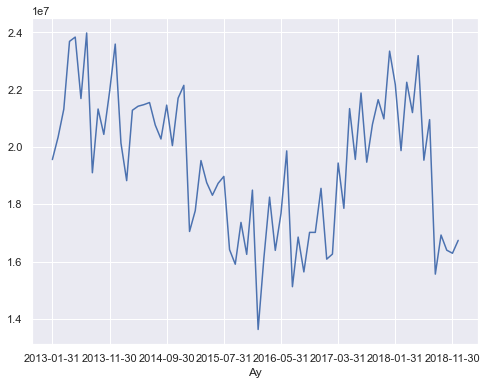

In [4]:
sns.set()
f = plt.figure(figsize=(8,6))
ax = f.add_subplot()
dataNew["Seri"].plot()
x_dates = dataNew.index.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')

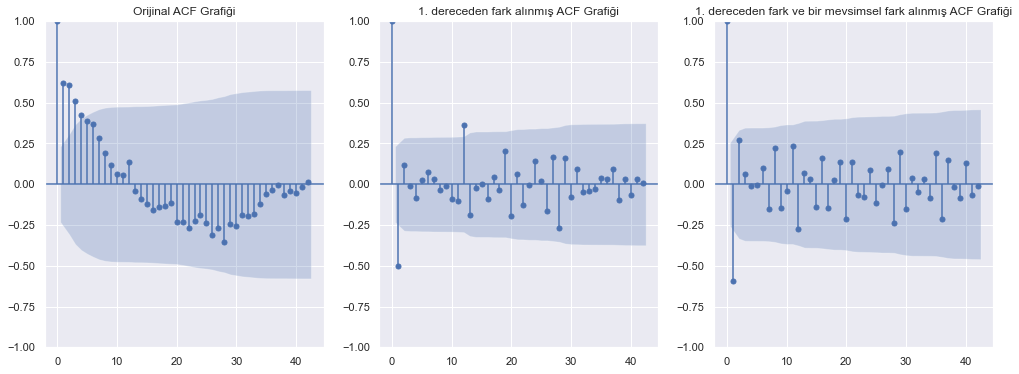

In [5]:
sns.set()
f = plt.figure(figsize=(17,6))
ax = f.add_subplot(131)
plot_acf(data["Seri"],lags=42,ax=ax)
plt.title("Orijinal ACF Grafiği")

ax2 = f.add_subplot(132)
plot_acf(data["Seri"].diff().dropna(),lags=42,ax=ax2)
plt.title("1. dereceden fark alınmış ACF Grafiği")

ax3 = f.add_subplot(133)
plot_acf(data["Seri"].diff().diff(12).dropna(),lags=42,ax=ax3)
plt.title("1. dereceden fark ve bir mevsimsel fark alınmış ACF Grafiği")

plt.show()

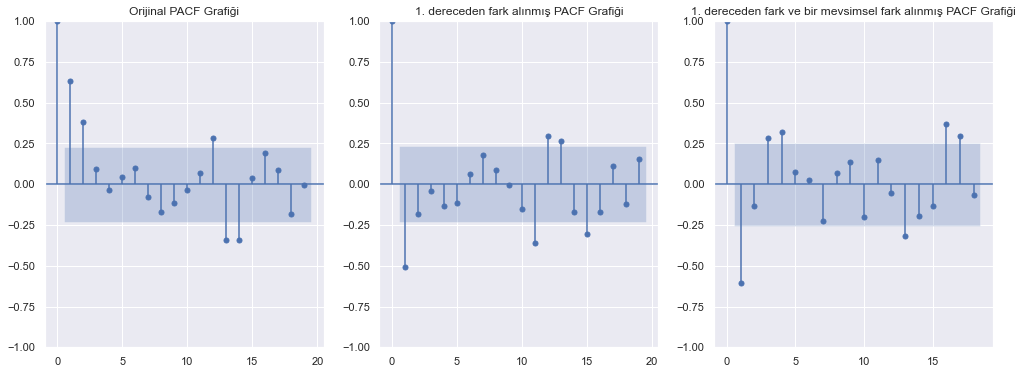

In [9]:
sns.set()
f = plt.figure(figsize=(17,6))
ax = f.add_subplot(131)
plot_pacf(data["Seri"],ax=ax)
plt.title("Orijinal PACF Grafiği")

ax2 = f.add_subplot(132)
plot_pacf(data["Seri"].diff().dropna(),ax=ax2)
plt.title("1. dereceden fark alınmış PACF Grafiği")

ax3 = f.add_subplot(133)
plot_pacf(data["Seri"].diff().diff(12).dropna(),ax=ax3)
plt.title("1. dereceden fark ve bir mevsimsel fark alınmış PACF Grafiği")

plt.show()